코렙에서 한글 사용

In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [199]:
!pip install mglearn

# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)


- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



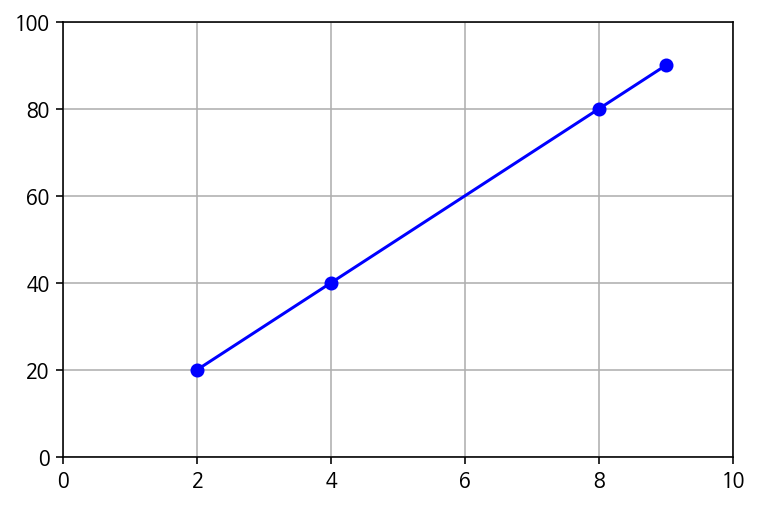

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

plt.xlim(0, 10)
plt.ylim(0, 100)
plt.grid(True)
plt.plot(x, y, 'b-o')

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>



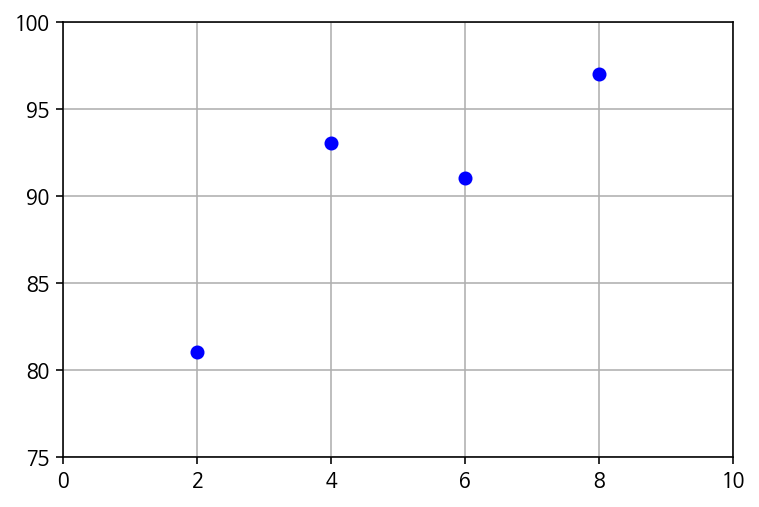

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.xlim(0, 10)
plt.ylim(75, 100)
plt.grid(True)
plt.plot(x, y, 'bo')

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


In [ ]:
a = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) )  /  ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1 = ( (2-5)*(81-90.5)+(4-5)*(93-90.5)+(6-5)*(91-90.5)+(8-5)*(97-90.5) ) 
a2 = ( (2-5)**2 + (4-5)**2 + (6-5)**2 + (8-5)**2 )
a1, a2, a

(46.0, 20, 2.3)

In [ ]:
x = [2, 4, 6, 8]
sum( [i*2 for i in x] )

40

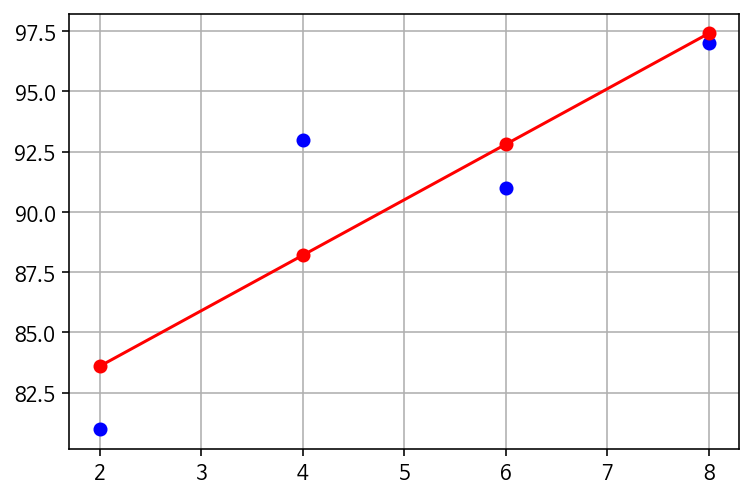

In [ ]:
# 오차가 최저가 되는 직선
import numpy as np

# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  # 분자부분
  d = 0
  for i in range(len(x)):
    d += (x[i] - mean_x) * (y[i] - mean_y)

  # 분모부분
  divisor = sum( [(i-mean_x)**2 for i in x] )

  a = d / divisor
  return a


x = [2, 4, 6, 8]
y = [81, 93, 91, 97]
mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, y, mx, my)
b = my - (mx * a)

y_new = [ a * x1 + b for x1 in x ]

plt.grid(True)
plt.plot(x, y, 'bo')
plt.plot(x, y_new, 'r-o')

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  \\( y=Wx+b \\)  
  - (W : 가중치, b : 편향(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

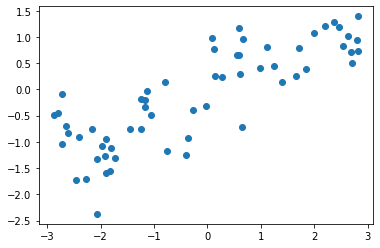

In [53]:
import numpy as np

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(60)
plt.scatter(X, y)

w[0]: 0.393906  b: -0.031804


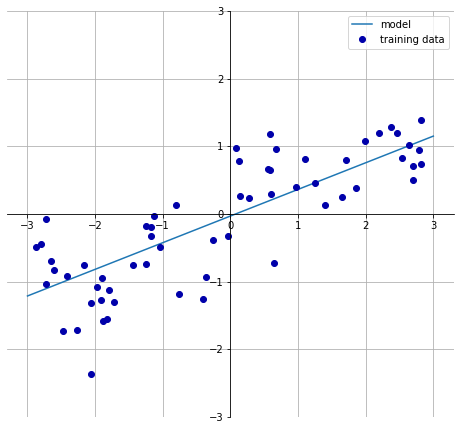

In [200]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

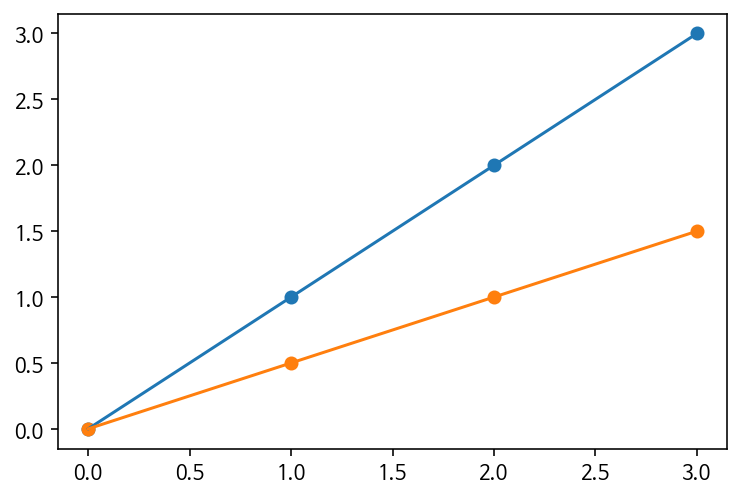

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred = w * x + b
plt.scatter(x, y_pred)
plt.plot(x, y_pred)

w = 0.5
b = 0
y_pred1 = w * x + b
plt.scatter(x, y_pred1)
plt.plot(x, y_pred1)

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [ ]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum( (y_pred - y)**2 ) / len(y)
  return cost

c = MSE(y_pred, y)
c1 = MSE(y_pred1, y)
c, c1

(0.0, 0.875)

#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

 0 w = 0.105972, b = 0.503813, cost = 3.500261, (y_pred-y).mean() = -1.204714
 1 w = 1.310686, b = 2.897409, cost = 1.282007, (y_pred-y).mean() = -0.381632
 2 w = 1.692318, b = 3.659521, cost = 0.856541, (y_pred-y).mean() = -0.121036
 3 w = 1.813354, b = 3.902103, cost = 0.806669, (y_pred-y).mean() = -0.038419
 4 w = 1.851773, b = 3.979301, cost = 0.803188, (y_pred-y).mean() = -0.012202
 5 w = 1.863975, b = 4.003865, cost = 0.802751, (y_pred-y).mean() = -0.003877
 6 w = 1.867852, b = 4.011680, cost = 0.802671, (y_pred-y).mean() = -0.001232
 7 w = 1.869084, b = 4.014166, cost = 0.802648, (y_pred-y).mean() = -0.000392
 8 w = 1.869476, b = 4.014957, cost = 0.802640, (y_pred-y).mean() = -0.000125
 9 w = 1.869600, b = 4.015209, cost = 0.802638, (y_pred-y).mean() = -0.000040
10 w = 1.869640, b = 4.015289, cost = 0.802637, (y_pred-y).mean() = -0.000013
11 w = 1.869653, b = 4.015314, cost = 0.802637, (y_pred-y).mean() = -0.000004
12 w = 1.869657, b = 4.015322, cost = 0.802636, (y_pred-y).mean(

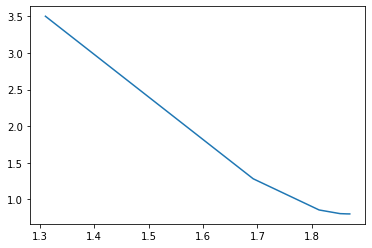

In [2]:
import numpy as np
import matplotlib.pyplot as plt
w_val = []
cost_val = []

n_samples = 200
x = np.random.randn(n_samples)

y = 2 * x + 4 + np.random.randn(n_samples)

num_epoch = 20  # 반복횟수
lr = 0.7        # learning_rate(학습 속도)

w = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
  y_pred = w * x + b
  cost = np.abs(y_pred - y).mean() # MAE
  xx = lr * ((y_pred - y) * x).mean()
  print(f"{epoch:2} w = {w:.6f}, b = {b:.6f}, cost = {cost:.6f}, (y_pred-y).mean() = {xx:.6f}")
  
  w = w - lr * ((y_pred - y) * x).mean()
  b = b - lr * (y_pred - y).mean()

  w_val.append(w)
  cost_val.append(cost)


plt.plot(w_val, cost_val)
plt.show()

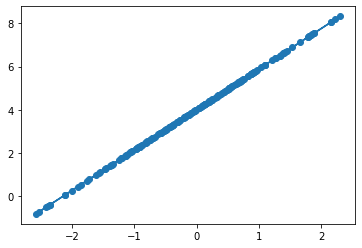

In [4]:
plt.plot(x,y_pred, marker='o')

#### LinearRegression 실습 01

배달시간 예측
- 설정 거리의 장소에 배달하려면 얼마나 걸리는지 예측

In [15]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

In [32]:
# 배달거리와 배달시간 데이터
data = np.array([
    [100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

data[:,0]

array([100, 150, 300, 400, 130, 240, 350, 200, 100, 110, 190, 120, 130,
       270, 255])

In [34]:
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
  # 분자부분
  d = 0
  for i in range(len(x)):
    d += (x[i] - mean_x) * (y[i] - mean_y)

  # 분모부분
  divisor = sum( [(i-mean_x)**2 for i in x] )

  a = d / divisor
  return a
x = data[:,0]
y = data[:,1]
x_mean = x.mean()
y_mean = y.mean()

a= compute_a(x,y,x_mean,y_mean)
b = y_mean - x_mean*a


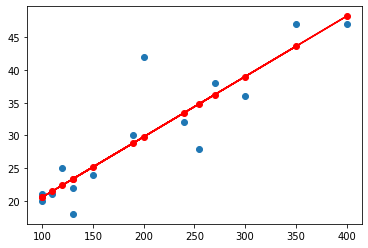

In [36]:
y_pred= [a*i +b for i in x]
plt.scatter(x,y)
plt.plot(x,y_pred,'ro-')
plt.show() 

- 예측하기 (거리가 350인경우 배달시간)

In [37]:
y_new = a*350 + b
y_new

43.63440484509667

#### 일반 선형회귀

예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

단순 선형회귀 (Simple Linear Regression)
> \\( H({ x })={ W }{ x }+b \\)

다변수 선형회귀 (Multi-variable Linear Regreesion)
> 변수가 3개 일때의 H(x) <br>
> \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+b \\)

> 변수가 n개 일때의 H(x) <br>
>  \\( H({ x }_{ 1 },{ x }_{ 2 },{ x }_{ 3 },\dots ,{ x }_{ n })={ W }_{ 1 }{ x }_{ 1 }+{ W }_{ 2 }{ x }_{ 2 }+{ W }_{ 3 }{ x }_{ 3 }+\dots +{ W }_{ n }{ x }_{ n }+b \\)

다항 회귀 (Polynomial Regreesion)
> 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것 <br>
> 차수가 높아질수록 과적합의 문제가 발생


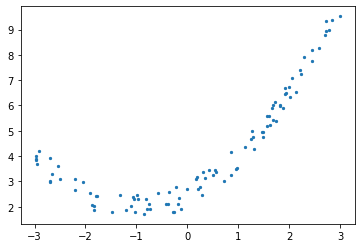

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
x_poly = poly_features.fit_transform(x)
x[0], x_poly[0]

(array([-0.86670225]), array([-0.86670225,  0.7511728 ]))

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)
model.intercept_,model.coef_

(array([2.47089125]), array([[1.0085042 , 0.51920203]]))

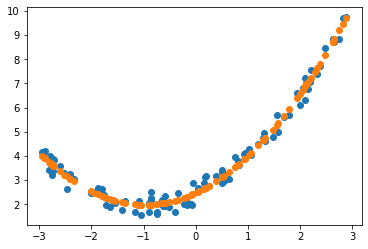

In [87]:
# plt
a1 = model.coef_[0][1]
a2 = model.coef_[0][0]
b = model.intercept_

y_pred = [a1*i**2 + a2*i +b for i in x]

plt.scatter(x,y)
plt.scatter(x,y_pred)

#### LinearRegression 실습 02

wave 데이터셋에 선형회귀 적용

LinearRegression()
```
LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
```
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- n_jobs : 계산에 사용할 작업 수

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_wave(60)
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      random_state=42 )

model = LinearRegression()
model.fit(X_train,y_train)
model.coef_, model.intercept_   # 사이킷런에서 내부에서 사용되는 속성은 _를 씀
print('훈련세트점수', model.score(X_train, y_train))
print('테스트세트점수', model.score(X_test, y_test))

훈련세트점수 0.6700890315075756
테스트세트점수 0.65933685968637


0.66 낮은 점수 => 과대적합? or 과소적합?

- <font  color=yellow>훈련 셋과 테스트 셋의 경우 정확도가 유사하지만 정확도가 많이 떨어짐 -> 과소적합</font>

- 사용한 특성이 단순하기 때문에 발생

훈련 세트 점수와 테스트 세트 점수가 매우 비슷 이는 과대적합이 아니라 과소적합인 상태를 의미

- 1차원 데이터셋에서는 모델이 매우 단순하므로 (혹은 제한적이므로) 과대적합을 걱정할 필요다. 
- (특성이 많은) 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높다.

#### LinearRegression 실습 03 - 1
변수가 1개인 경우

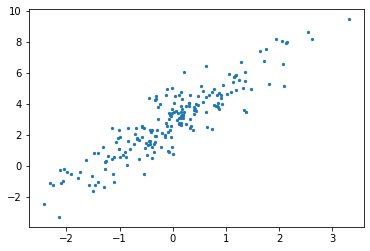

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w=2
b=3

# 노이즈
y= w*x +b+np.random.randn(n_samples)
plt.scatter(x,y,s=5)

In [114]:
# 피어슨 상관계수 값을 계산
# 그래프 기울기 방향 '\'
# 가로축, 세로축에 x, y를 두었을 때 자기 자신하고 비교하면 무조건 상관계수가 1이 나오는 특성 때문
np.corrcoef(x, y)

array([[1.       , 0.9062344],
       [0.9062344, 1.       ]])

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x.reshape(-1,1), y)     # 피쳐로 들어가는 것은 

model.coef_, model.intercept_

(array([2.00350007]), 2.9482483411861695)

#### LinearRegression 실습 03 - 2
변수가 2개인 경우

다변수 선형 회귀 (Multi-variable Linear Regreesion)



In [159]:
n_samples = 200

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2*x1 + 3*x2 + 4 +np.random.randn(n_samples)

model = LinearRegression()
X = pd.DataFrame({'x1':x1 , 'x2':x2})

model.fit(X,y)

model.coef_, model.intercept_

(array([1.96036423, 3.013977  ]), 3.9582179900428884)

#### LinearRegression 실습 04

보스턴 집값 데이터셋 구성
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
```
0 CRIM : 인구 1인당 범죄 발생 수
1 ZN : 25,000평방 피트 이상의 주거 구역 비중
2 INDUS : 소매업 외 상업이 차지하는 면적 비율
3 CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
4 NOX : 일산화질소 농도
5 RM : 집의 평균 방 수
6 AGE : 1940년 이전 지어진 비율
7 DIS : 5가지 보스턴 시 고용 시설까지의 거리
8 RAD : 순환고속도로의 접근 용이성
9 TAX : $10,000당 부동산 세율 총계
10 PTRATIO : 지역별 학생과 교사 비율
11 B : 지역별 흑인 비율
12 LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
13 MEDV : 가격 (단위 : $1,000)
```

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [165]:
# 데이터 세트 DataFrame 변환
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [175]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,0:-1],boston_df['price'],random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((379, 13), (127, 13), (379,), (127,))

In [181]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train), model.score(X_test,y_test)

(0.7697699488741149, 0.635463843320211)

In [182]:
# 예측/평가
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse, np.sqrt(mse) #RMSE

(29.782245092302524, 5.457311159564069)

In [186]:
# 특성(피처)별 회귀 계수 값 순으로 출력
X_data = boston_df.iloc[:,:13]
coeff = pd.Series(data=np.round(model.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.8
CHAS        2.4
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.4
NOX       -15.6
dtype: float64

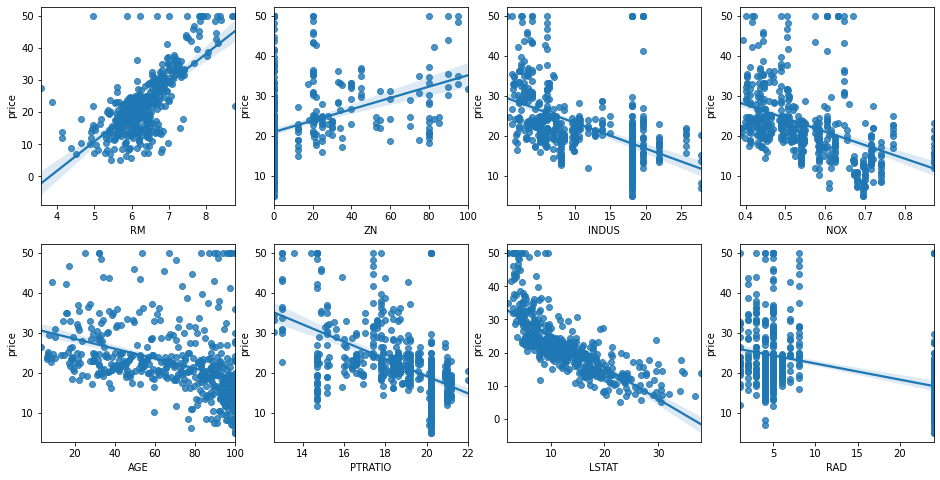

In [192]:
# 데이터 조사
# 시각화
# 2행 4열, axs는 4x2 개의 ax를 갖음
fig, axis = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
im_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i,feature in enumerate(im_features):
  row= int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='price',data=boston_df,ax=axis[row][col])

#### LinearRegression 실습 05

유방암 데이터셋에 선형회귀 적용

In [193]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [194]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [195]:
model =LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)


(0.7824123695930644, 0.7291758706114018)

#### LinearRegression 실습 06 (과적합 예시)

확장 보스턴 집값 셋에 선형회귀 적용

In [205]:
import mglearn

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)  # lr_model_extended_boston

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 훈련 셋에 비해 테스트 셋의 경우 정확도가 많이 떨어짐 -> 과대적합

In [204]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9520519609032727, 0.607472195966557)

#### LinearRegression 실습 07

붓꽃 데이터 셋에 선형회귀 적용

In [209]:
from sklearn.datasets import load_iris

iris = load_iris()

#sepal 꽃밭침
#petal 꽃잎

꽃받침 길이와 꽂잎 길이를 이용한 선형회귀

In [210]:
X_all = iris.data
X = X_all[:,0]  # 꽃받침 길이
y = X_all[:,2]  # 꽃잎 길이
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),
                                                    y,
                                                    random_state=0)
X_train.shape

(112, 1)

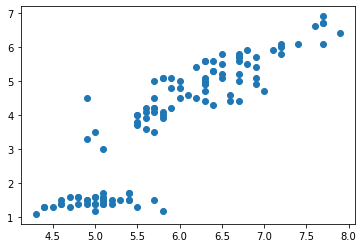

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt

#두 가지 특성을 시각화 
plt.scatter(X_train,y_train)

In [218]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train), model.score(X_test,y_test)

(0.7864459990171911, 0.6634802872219325)

In [219]:
# 계수(가중치)와 절편
model.coef_, model.intercept_

(array([1.83273771]), -6.99217830038047)

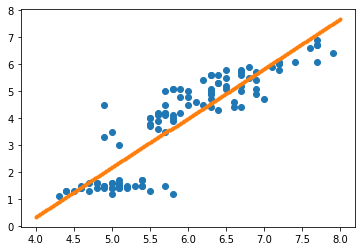

In [222]:
import numpy as np
plt.scatter(X_train,y_train)

xx=np.linspace(4,8,200)
plt.scatter(x=xx,y=[model.coef_* xx + model.intercept_],marker = '.')

꽃잎 길이와 꽂잎 너비를 이용한 선형회귀

In [224]:
# 꽃잎 길이
# 꽃잎 너비
iris.feature_names
XX = iris.data[:,2]
yy = iris.data[:,3]

In [230]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(XX.reshape(-1,1),yy,random_state=0)

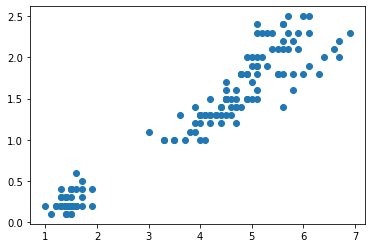

In [231]:
#두 가지 특성을 시각화
plt.scatter(XX,yy)

In [232]:
# model2 
model= LinearRegression()
model.fit(X_train2,y_train2)
model.coef_, model.intercept_

(array([0.4198152]), -0.3705841202176685)

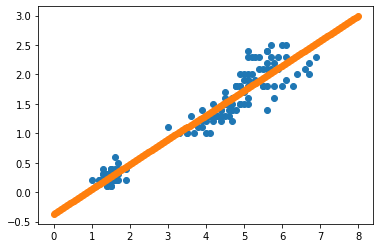

In [234]:
# plt
xx = np.linspace(0,8,200)
plt.scatter(XX,yy)
plt.scatter(xx,[model.coef_*xx +model.intercept_])

In [237]:
# 테스트 셋을 사용한 평가
model.score(X_train2,y_train2),model.score(X_test2,y_test2)

(0.9358824215964661, 0.8931453922584154)

In [238]:
# score
model.predict(X_test2)

array([1.77047338, 1.30867666, 0.21715715, 2.27425162, 0.25913867,
       2.14830706, 0.17517563, 1.6025473 , 1.64452882, 1.30867666,
       1.98038098, 1.51858426, 1.6025473 , 1.56056578, 1.6025473 ,
       0.21715715, 1.51858426, 1.47660274, 0.21715715, 0.17517563,
       1.68651034, 1.51858426, 0.42706475, 0.21715715, 1.64452882,
       0.04923108, 0.42706475, 1.43462122, 1.01480603, 0.30112019,
       1.93839946, 1.51858426, 0.25913867, 1.68651034, 1.98038098,
       1.26669515, 0.34310171, 1.77047338])

장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.
- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.


모델 정규화(Regularization, 규제)을 통해 과대적합을 제어